# Scratchpad for testing out graphlab with project data

In [1]:
import json
import numpy as np
import graphlab as gl
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

[INFO] graphlab.cython.cy_server: GraphLab Create v1.10.1 started. Logging: /tmp/graphlab_server_1467245530.log


This non-commercial license of GraphLab Create is assigned to windsurf_dean@yahoo.com and will expire on May 26, 2017. For commercial licensing options, visit https://dato.com/buy/.


## Load in user-item-rating data...

In [2]:
# create Pandas DF with data pulled from Postgres (restaurant only reviews)
df = pd.read_csv('data_analysis/user_reviews.csv', header=None,
                 names=['user_id', 'business_id', 'bus_name', 'stars', 'locale'])

In [3]:
df.head()

,user_id,business_id,bus_name,stars,locale
0,Ouus3lC3Xk3YRGx4ptd_4A,DW6SI2KxcfXBHeo9jEr4lQ,Pyramid Cafe,2,"Las Vegas, NV"
1,dz_sBsL69aWzsxksT2O_Mg,DW6SI2KxcfXBHeo9jEr4lQ,Pyramid Cafe,2,"Las Vegas, NV"
2,zyI-u0C1YOzp5v1j2wuCOQ,DW6SI2KxcfXBHeo9jEr4lQ,Pyramid Cafe,3,"Las Vegas, NV"
3,vyfsQo-estP8EfiIFMsL6g,DW6SI2KxcfXBHeo9jEr4lQ,Pyramid Cafe,3,"Las Vegas, NV"
4,lxZSVeJz6KEBW1nlA3JKJg,DW6SI2KxcfXBHeo9jEr4lQ,Pyramid Cafe,1,"Las Vegas, NV"


In [4]:
# store the observation data in Graphlab's SFrame type
sf_obs = gl.SFrame(df[['user_id', 'business_id', 'stars']])

In [5]:
sf_obs.head()

user_id,business_id,stars
Ouus3lC3Xk3YRGx4ptd_4A,DW6SI2KxcfXBHeo9jEr4lQ,2
dz_sBsL69aWzsxksT2O_Mg,DW6SI2KxcfXBHeo9jEr4lQ,2
zyI-u0C1YOzp5v1j2wuCOQ,DW6SI2KxcfXBHeo9jEr4lQ,3
vyfsQo-estP8EfiIFMsL6g,DW6SI2KxcfXBHeo9jEr4lQ,3
lxZSVeJz6KEBW1nlA3JKJg,DW6SI2KxcfXBHeo9jEr4lQ,1
CbMCOeeHVeafcD-6-CJrPg,DW6SI2KxcfXBHeo9jEr4lQ,4
Z8DyUMojRhFbLyHBymM_rA,DW6SI2KxcfXBHeo9jEr4lQ,2
sXWvDlMQspjJ1zzr3cEM7Q,DW6SI2KxcfXBHeo9jEr4lQ,2
G8RaaiVzbyRvsBmoUx0VeA,DW6SI2KxcfXBHeo9jEr4lQ,1
f0isFKnJVZVmpdCPNd8Gfw,DW6SI2KxcfXBHeo9jEr4lQ,1


In [6]:
# number of reviews by user (388k distinct users)
num_review_array = sf_obs.groupby('user_id', [gl.aggregate.COUNT()]).sort('Count', ascending=False)['Count']

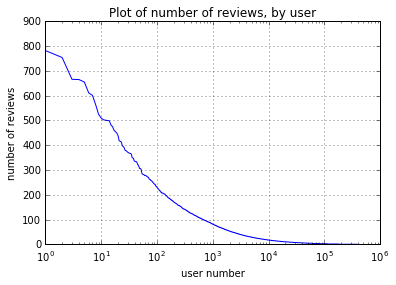

In [7]:
plt.semilogx(num_review_array);
plt.grid()
plt.xlabel('user number')
plt.ylabel('number of reviews')
plt.title('Plot of number of reviews, by user')

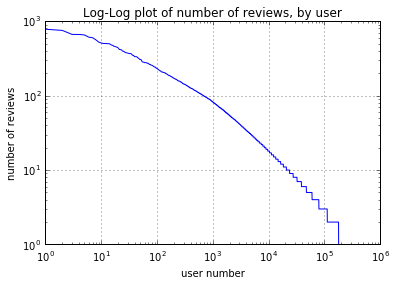

In [8]:
plt.loglog(num_review_array);
plt.grid()
plt.xlabel('user number')
plt.ylabel('number of reviews')
plt.title('Log-Log plot of number of reviews, by user')

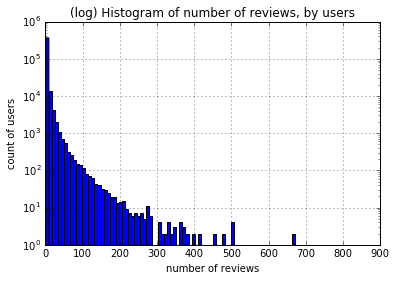

In [41]:
plt.hist(num_review_array, bins=100, log=True);
plt.grid()
plt.xlabel('number of reviews')
plt.ylabel('count of users')
plt.title('(log) Histogram of number of reviews, by users')

## Load in business.json file as 'item_data', for side data factorization...

In [10]:
# create Pandas DF from json business data
fname_test = 'data_analysis/test_data/test100_business.json'
fname_full = 'data_analysis/full_data/yelp_academic_dataset_business.json'

In [11]:
fname = fname_full
with open(fname) as js_file:
    js_list = [json.loads(js_line) for js_line in js_file]
    js_list_filtered = [js for js in js_list if 'Restaurants' in js['categories']]
    dfb = pd.DataFrame(js_list_filtered)

In [12]:
print '{} = Orig business list size'.format(len(js_list))
print '{} = Restaurant list size'.format(len(js_list_filtered))

77445 = Orig business list size
25071 = Restaurant list size


In [13]:
dfb.head(3)

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,"{u'Take-out': True, u'Drive-Thru': False, u'Ou...",5UmKMjUEUNdYWqANhGckJw,"[Fast Food, Restaurants]",Dravosburg,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{u'Tuesday': {u'close': u'21:00', u'open': u'1...",40.354327,-79.900706,Mr Hoagie,[],True,4,4.5,PA,business
1,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...",mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",rankin,"414 Hawkins Ave\nrankin, PA 15104","{u'Tuesday': {u'close': u'19:00', u'open': u'1...",40.413464,-79.880247,Emil's Lounge,[],True,20,5.0,PA,business
2,"{u'Alcohol': u'full_bar', u'Noise Level': u'lo...",KayYbHCt-RkbGcPdGOThNg,"[Bars, American (Traditional), Nightlife, Rest...",Carnegie,"141 Hawthorne St\nGreentree\nCarnegie, PA 15106","{u'Monday': {u'close': u'02:00', u'open': u'11...",40.415517,-80.067534,Alexion's Bar & Grill,[Greentree],True,21,4.0,PA,business


In [14]:
# quick peek at business_id and name
dfb[['business_id', 'name']].head()

,business_id,name
0,5UmKMjUEUNdYWqANhGckJw,Mr Hoagie
1,mVHrayjG3uZ_RLHkLj-AMg,Emil's Lounge
2,KayYbHCt-RkbGcPdGOThNg,Alexion's Bar & Grill
3,wJr6kSA5dchdgOdwH6dZ2w,Kings Family Restaurant
4,fNGIbpazjTRdXgwRY_NIXA,Rocky's Lounge


### Handle the 'attribute' field

which contains nested json fields...

In [15]:
# handle the attribute field...
df_att = pd.io.json.json_normalize(dfb['attributes'])
df_att.columns = ['Attributes.'+col for col in df_att.columns]
df_att.head()

,Attributes.Accepts Credit Cards,Attributes.Accepts Insurance,Attributes.Ages Allowed,Attributes.Alcohol,Attributes.Ambience.casual,Attributes.Ambience.classy,Attributes.Ambience.divey,Attributes.Ambience.hipster,Attributes.Ambience.intimate,Attributes.Ambience.romantic,...,Attributes.Parking.street,Attributes.Parking.valet,Attributes.Parking.validated,Attributes.Price Range,Attributes.Smoking,Attributes.Take-out,Attributes.Takes Reservations,Attributes.Waiter Service,Attributes.Wheelchair Accessible,Attributes.Wi-Fi
0,True,NaN,NaN,none,False,False,False,False,False,False,...,False,False,False,1.0,NaN,True,False,False,NaN,NaN
1,True,NaN,NaN,full_bar,False,False,False,False,False,False,...,False,False,False,1.0,no,True,False,True,NaN,no
2,True,NaN,NaN,full_bar,True,False,False,False,False,False,...,False,False,False,1.0,outdoor,True,False,True,NaN,free
3,True,NaN,NaN,none,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,1.0,NaN,True,False,True,True,NaN
4,True,NaN,NaN,full_bar,False,False,False,False,False,False,...,False,False,False,1.0,no,True,False,True,True,free


In [16]:
df_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25071 entries, 0 to 25070
Data columns (total 63 columns):
Attributes.Accepts Credit Cards                23547 non-null object
Attributes.Accepts Insurance                   2 non-null object
Attributes.Ages Allowed                        27 non-null object
Attributes.Alcohol                             20531 non-null object
Attributes.Ambience.casual                     19136 non-null object
Attributes.Ambience.classy                     19136 non-null object
Attributes.Ambience.divey                      18548 non-null object
Attributes.Ambience.hipster                    19012 non-null object
Attributes.Ambience.intimate                   19136 non-null object
Attributes.Ambience.romantic                   19136 non-null object
Attributes.Ambience.touristy                   19136 non-null object
Attributes.Ambience.trendy                     19136 non-null object
Attributes.Ambience.upscale                    19029 non-null object
A

Wow... lot of NaN / Null. How to handle this?

### Handle the 'categories' field

Which is a flat list of categories.

The data has already been filtered down to contain 'Restaurants' in the field.

Found hint/solution here: http://datascience.stackexchange.com/questions/8253/how-to-binary-encode-multi-valued-categorical-variable-from-pandas-dataframe

In [17]:
import collections

In [18]:
dfb[['categories']].head()

,categories
0,"[Fast Food, Restaurants]"
1,"[Bars, American (New), Nightlife, Lounges, Res..."
2,"[Bars, American (Traditional), Nightlife, Rest..."
3,"[Burgers, Breakfast & Brunch, American (Tradit..."
4,"[Bars, American (Traditional), Nightlife, Loun..."


In [19]:
# apply collections.counter() to get a dict of hashable objects...
dfb_cat_dict = dfb['categories'].apply(collections.Counter)
dfb_cat_dict.head()

0                 {u'Restaurants': 1, u'Fast Food': 1}
1    {u'Bars': 1, u'Restaurants': 1, u'Nightlife': ...
2    {u'American (Traditional)': 1, u'Bars': 1, u'N...
3    {u'American (Traditional)': 1, u'Burgers': 1, ...
4    {u'American (Traditional)': 1, u'Bars': 1, u'N...
Name: categories, dtype: object

In [20]:
df_cat_full = pd.DataFrame.from_records(dfb_cat_dict).fillna(value=0).astype(int)
df_cat_full.head()

,Active Life,Adult Entertainment,Afghan,African,Alsatian,Amateur Sports Teams,American (New),American (Traditional),Amusement Parks,Antiques,...,Uzbek,Vegan,Vegetarian,Venezuelan,Venues & Event Spaces,Vietnamese,Wine Bars,Wineries,Wok,Yoga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# hand-picked category EXCLUSION list (for below)...
exclude_cat = ['Active Life', 'Amateur Sports Teams', 'Amusement Parks', 'Antiques', 'Apartments',
               'Appliances', 'Arcades', 'Art Galleries', 'Arts & Crafts', 'Arts & Entertainment',
               'Auto Repair', 'Automotive', 'Banks & Credit Unions', 'Beauty & Spas', 'Bed & Breakfast',
               'Bikes', 'Boating', 'Books, Mags, Music & Video', 'Bookstores', 'Bowling']

In [22]:
df_cat_full.head().T[0:50]

,0,1,2,3,4
Active Life,0,0,0,0,0
Adult Entertainment,0,0,0,0,0
Afghan,0,0,0,0,0
African,0,0,0,0,0
Alsatian,0,0,0,0,0
Amateur Sports Teams,0,0,0,0,0
American (New),0,1,0,0,0
American (Traditional),0,0,1,1,1
Amusement Parks,0,0,0,0,0
Antiques,0,0,0,0,0


In [23]:
# hand-picked category EXCLUSION list (for below)...
exclude_cat += ['Building Supplies', 'Butcher', 'Candy Stores', 'Car Wash', 'Caterers', 'Chocolatiers & Shops',
                'Coffee & Tea Supplies', 'Colleges & Universities', 'Convenience Stores', 'Cooking Schools',
                'Country Clubs', 'Country Dance Halls', 'DJs', 'Dance Clubs', 'Day Spas', 'Department Stores']

In [24]:
df_cat_full.head().T[50:100]

,0,1,2,3,4
Breweries,0,0,0,0,0
British,0,0,0,0,0
Bubble Tea,0,0,0,0,0
Buffets,0,0,0,0,0
Building Supplies,0,0,0,0,0
Burgers,0,0,0,1,0
Burmese,0,0,0,0,0
Butcher,0,0,0,0,0
Cafes,0,0,0,0,0
Cafeteria,0,0,0,0,0


In [25]:
# hand-picked category EXCLUSION list (for below)...
exclude_cat += ['Discount Store', 'Do-It-Yourself Food', 'Dry Cleaning & Laundry', 'Education',
                'Event Planning & Services', 'Fashion', 'Festivals', 'Financial Services',
                'Fitness & Instruction', 'Flea Markets', 'Flowers & Gifts', 'Food Delivery Services',
                'Food Tours', 'Furniture Stores', 'Gas & Service Stations', 'Gay Bars', 'Golf', 'Grocery',
                'Guest Houses', 'Hardware Stores']

In [26]:
df_cat_full.head().T[100:150]

,0,1,2,3,4
Diners,0,0,0,0,0
Discount Store,0,0,0,0,0
Distilleries,0,0,0,0,0
Dive Bars,0,0,0,0,0
Do-It-Yourself Food,0,0,0,0,0
Dominican,0,0,0,0,0
Donuts,0,0,0,0,0
Dry Cleaning & Laundry,0,0,0,0,0
Eastern European,0,0,0,0,0
Education,0,0,0,0,0


In [27]:
# hand-picked category EXCLUSION list (for below)...
exclude_cat += ['Health & Medical', 'Health Markets', 'Heating & Air Conditioning/HVAC', 'Herbs & Spices',
                'Hiking', 'Hobby Shops', 'Home & Garden', 'Home Decor', 'Home Services', 'Hotels', 'Hotels & Travel',
                'Jazz & Blues', 'Karaoke', 'Kids Activities', 'Kitchen & Bath', 'Lakes',
                'Landmarks & Historical Buildings', 'Leisure Centers', 'Local Services', 'Lounges', 'Meat Shops']

In [28]:
df_cat_full.head().T[150:200]

,0,1,2,3,4
Health & Medical,0,0,0,0,0
Health Markets,0,0,0,0,0
Heating & Air Conditioning/HVAC,0,0,0,0,0
Herbs & Spices,0,0,0,0,0
Hiking,0,0,0,0,0
Himalayan/Nepalese,0,0,0,0,0
Hobby Shops,0,0,0,0,0
Home & Garden,0,0,0,0,0
Home Decor,0,0,0,0,0
Home Services,0,0,0,0,0


In [29]:
# hand-picked category EXCLUSION list (for below)...
exclude_cat += ['Music Venues', 'Musicians', 'Nightlife', 'Nutritionists', 'Organic Stores', 'Parking',
                'Party & Event Planning', 'Pasta Shops', 'Patisserie/Cake Shop', 'Performing Arts',
                'Personal Chefs', 'Pet Services', 'Pets', 'Piano Bars', 'Plumbing', 'Pool Halls',
                'Public Services & Government', 'Real Estate', 'Shopping']

In [30]:
df_cat_full.head().T[200:250]

,0,1,2,3,4
Modern European,0,0,0,0,0
Mongolian,0,0,0,0,0
Moroccan,0,0,0,0,0
Music Venues,0,0,0,0,0
Musicians,0,0,0,0,0
Nightlife,0,1,1,0,1
Nutritionists,0,0,0,0,0
Organic Stores,0,0,0,0,0
Oriental,0,0,0,0,0
Pakistani,0,0,0,0,0


In [31]:
# hand-picked category EXCLUSION list (for below)...
exclude_cat += ['Shopping Centers', 'Soccer', 'Social Clubs', 'Specialty Schools', 'Sporting Goods', 'Sports Clubs',
                'Sports Wear', 'Street Vendors', 'Swimming Pools', 'Tea Rooms', 'Tours', 'Toy Stores',
                'Travel Services', 'Venues & Event Spaces', 'Wine Bars', 'Yoga']

In [32]:
df_cat_full.head().T[250:]

,0,1,2,3,4
Shopping Centers,0,0,0,0,0
Singaporean,0,0,0,0,0
Slovakian,0,0,0,0,0
Soccer,0,0,0,0,0
Social Clubs,0,0,0,0,0
Soul Food,0,0,0,0,0
Soup,0,0,0,0,0
Southern,0,0,0,0,0
Spanish,0,0,0,0,0
Specialty Food,0,0,0,0,0


In [33]:
print '{} = number of orig categories'.format(len(df_cat_full.T))
print '{} = number of excluded categories'.format(len(exclude_cat))
exclude_cat

296 = number of orig categories
112 = number of excluded categories


['Active Life',
 'Amateur Sports Teams',
 'Amusement Parks',
 'Antiques',
 'Apartments',
 'Appliances',
 'Arcades',
 'Art Galleries',
 'Arts & Crafts',
 'Arts & Entertainment',
 'Auto Repair',
 'Automotive',
 'Banks & Credit Unions',
 'Beauty & Spas',
 'Bed & Breakfast',
 'Bikes',
 'Boating',
 'Books, Mags, Music & Video',
 'Bookstores',
 'Bowling',
 'Building Supplies',
 'Butcher',
 'Candy Stores',
 'Car Wash',
 'Caterers',
 'Chocolatiers & Shops',
 'Coffee & Tea Supplies',
 'Colleges & Universities',
 'Convenience Stores',
 'Cooking Schools',
 'Country Clubs',
 'Country Dance Halls',
 'DJs',
 'Dance Clubs',
 'Day Spas',
 'Department Stores',
 'Discount Store',
 'Do-It-Yourself Food',
 'Dry Cleaning & Laundry',
 'Education',
 'Event Planning & Services',
 'Fashion',
 'Festivals',
 'Financial Services',
 'Fitness & Instruction',
 'Flea Markets',
 'Flowers & Gifts',
 'Food Delivery Services',
 'Food Tours',
 'Furniture Stores',
 'Gas & Service Stations',
 'Gay Bars',
 'Golf',
 'Grocery'

Drop the categories in the exclusion list

In [34]:
df_cat = df_cat_full.drop(exclude_cat, axis=1)
df_cat.head()

,Adult Entertainment,Afghan,African,Alsatian,American (New),American (Traditional),Arabian,Argentine,Armenian,Asian Fusion,...,Trinidadian,Turkish,Ukrainian,Uzbek,Vegan,Vegetarian,Venezuelan,Vietnamese,Wineries,Wok
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Combining the 'categories' and 'attributes' into item data

In [35]:
# df_item_data = pd.concat([dfb[['business_id', 'name']] , df_cat, df_att], axis=1)

df_item_data = pd.concat([dfb[['business_id', 'name']] , df_cat], axis=1) # categories for now...
df_item_data.head()

,business_id,name,Adult Entertainment,Afghan,African,Alsatian,American (New),American (Traditional),Arabian,Argentine,...,Trinidadian,Turkish,Ukrainian,Uzbek,Vegan,Vegetarian,Venezuelan,Vietnamese,Wineries,Wok
0,5UmKMjUEUNdYWqANhGckJw,Mr Hoagie,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,mVHrayjG3uZ_RLHkLj-AMg,Emil's Lounge,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,KayYbHCt-RkbGcPdGOThNg,Alexion's Bar & Grill,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,wJr6kSA5dchdgOdwH6dZ2w,Kings Family Restaurant,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,fNGIbpazjTRdXgwRY_NIXA,Rocky's Lounge,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# convert to SFrame...
sf_itemdata = gl.SFrame(df_item_data)

# Setup the train/test data split...

In [37]:
sf_obs.shape

(1363242, 3)

In [38]:
sf_obs.column_names()

['user_id', 'business_id', 'stars']

In [39]:
# split the test data via Graphlab's recommender tailored splitter function
train_set, test_set = gl.recommender.util.random_split_by_user(sf_obs,
                                                               'user_id',
                                                               'business_id',
                                                               max_num_users=100)

# Run the recommender...

In [40]:
# create the recommender (will train during this step)
rec = gl.recommender.create(
            train_set,
            user_id='user_id',
            item_id='business_id',
            target='stars',
            item_data=sf_itemdata)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1363188 observations with 388605 users and 25071 items.

Data prepared in: 3.84697s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 170398 / 1363188 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 1                 | Not Viable                               |

| 1       | 0.25              | Not Viable                               |

| 2       | 0.0625            | Not Viable                               |

| 3       | 0.015625          | No Decrease (8.04913 >= 3.31822)         |

| 4       | 0.00390625        | 3.11364                                  |

| 5       | 0.00195312        | No Decrease (3.43876 >= 3.31822)         |

| 6       | 0.000488281       | 3.2705                                   |

| 7       | 0.000244141       | 3.3049                                   |

+---------+-------------------+------------------------------------------+

| Final   | 0.00390625        | 3.11364                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 1.048ms      | 3.32565           | 1.30233               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 2m 18s       | 3.18575           | 1.27608               | 0.00390625  |

| 2       | 4m 33s       | 3.12715           | 1.26712               | 0.00390625  |

| 3       | 6m 48s       | 3.07667           | 1.26255               | 0.00390625  |

| 4       | 9m 12s       | 3.17664           | 1.30604               | 0.00390625  |

| 5       | 11m 37s      | 3.39125           | 1.31435               | 0.00390625  |

| 6       | 14m 9s       | 3.11987           | 1.2847                | 0.00390625  |

| 7       | 17m 14s      | DIVERGED          | DIVERGED              | 0.00390625  |

| RESET   | 18m 7s       | 3.32572           | 1.30234               |             |

| 1       | 20m 20s      | 3.25634           | 1.28669               | 0.00195312  |

| 2       | 22m 37s      | 3.19979           | 1.27817               | 0.00195312  |

| 3       | 24m 57s      | 3.16845           | 1.27348               | 0.00195312  |

| 4       | 27m 20s      | 3.14421           | 1.27012               | 0.00195312  |

| 5       | 29m 39s      | 3.12102           | 1.26762               | 0.00195312  |

| 6       | 48m 18s      | 3.13673           | 1.28002               | 0.00195312  |

| 7       | 50m 54s      | 3.72913           | 1.40739               | 0.00195312  |

| 8       | 53m 18s      | 4.05146           | 1.55235               | 0.00195312  |

| 9       | 56m 33s      | DIVERGED          | DIVERGED              | 0.00195312  |

| RESET   | 57m 34s      | 3.32562           | 1.30232               |             |

| 1       | 59m 56s      | 3.309             | 1.3052                | 0.000976562 |

| 2       | 1h 2m        | 3.21389           | 1.28288               | 0.000976562 |

| 3       | 1h 4m        | 3.15244           | 1.27503               | 0.000976562 |

| 4       | 1h 7m        | 3.11867           | 1.27383               | 0.000976562 |

| 5       | 1h 9m        | 3.09139           | 1.27317               | 0.000976562 |

| 6       | 1h 11m       | 3.06892           | 1.2726                | 0.000976562 |

| 7       | 1h 13m       | 3.04703           | 1.27314               | 0.000976562 |

| 8       | 1h 16m       | 3.02888           | 1.27366               | 0.000976562 |

| 9       | 1h 18m       | 3.01479           | 1.27385               | 0.000976562 |

| 10      | 1h 20m       | 3.00287           | 1.27414               | 0.000976562 |

| 11      | 1h 22m       | 2.99232           | 1.27444               | 0.000976562 |

[ERROR] graphlab.toolkits._main: Toolkit error: Cancelled by user.


ToolkitError: Cancelled by user.

In [ ]:
# rec = gl.recommender.create(
#             sf_obj,
#             user_id='user_id',
#             item_id='business_id',
#             target ='stars')

In [ ]:
# evaluate 1 datapoint (user=1, business=100) for potential rating
one_datapoint_sf = graphlab.SFrame({'user_id': [1], 'business_id': [100]})
print "stars:", rec.predict(one_datapoint_sf)[0]   # 4.879

In [ ]:
rec.list_fields()

In [ ]:
rec.get('coefficients')['intercept']

In [ ]:
# rec['coefficients']  # equivalent to: rec.get('coefficients')
rec.get('coefficients')['user_id']

In [ ]:
# rec['coefficients']  # equivalent to: rec.get('coefficients')
rec.get('coefficients')['business_id']

In [ ]:
business_sf = rec['coefficients']['business_id']
print len(business_sf)                     # 1682
print len(business_sf['factors'][0])       # 8
user_sf = rec['coefficients']['user_id']
print len(user_sf)                      # 943
print len(user_sf['factors'][0])        # 8

In [ ]:
import os

In [ ]:
os.path.getsize()

In [ ]:
import progressbar

In [ ]:
progressbar.__version__

In [ ]:
bar = progressbar.ProgressBar

scratch pad...

If [0, 1, 2] are numerical labels and is not the index, then pandas.DataFrame.pivot_table works:

This blog post was helpful: http://pbpython.com/pandas-pivot-table-explained.html

In [ ]:
data = pd.DataFrame.from_records(
    [[0, 'A'], [0, 'B'], [1, 'B'], [1, 'C'], [1, 'D'], [2, 'B'], [2, 'D']],
    columns=['number_label', 'category'])
data

In [ ]:
data.pivot_table(index=['number_label'], columns=['category'], aggfunc=[len], fill_value=0)

If [0, 1, 2] is the index, then collections.Counter is useful:

In [ ]:
data2 = pd.DataFrame.from_dict({'categories': {0: ['A', 'B'],
                                               1: ['B', 'C', 'D'],
                                               2:['B', 'D']}})
data2

In [ ]:
import collections

In [ ]:
data3 = data2['categories'].apply(collections.Counter)
data3

In [ ]:
pd.DataFrame.from_records(data3).fillna(value=0).astype(int)

In [ ]:
collections.Counter